In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as pgo

import warnings
warnings.filterwarnings('ignore')

# features
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# training and optimization
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV # Allows us to test parameters of classification algorithms and find the best one

# classification model metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score, log_loss
from sklearn.metrics import roc_curve, roc_auc_score

# 1. Load Data and initial check

In [2]:
df_customers = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df_customers.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df_customers.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# check missing data
df_customers.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
print(df_customers.shape)
len(df_customers['customerID'].unique())

(7043, 21)


7043

In [7]:
dfc = df_customers.drop(columns=['customerID'])

# deal with TotalCharges, and use it 
dfc['TotalCharges'].replace(to_replace = ' ', value= np.nan, inplace = True)
dfc['TotalCharges'] = dfc['TotalCharges'].astype(float)

In [8]:
dfc.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

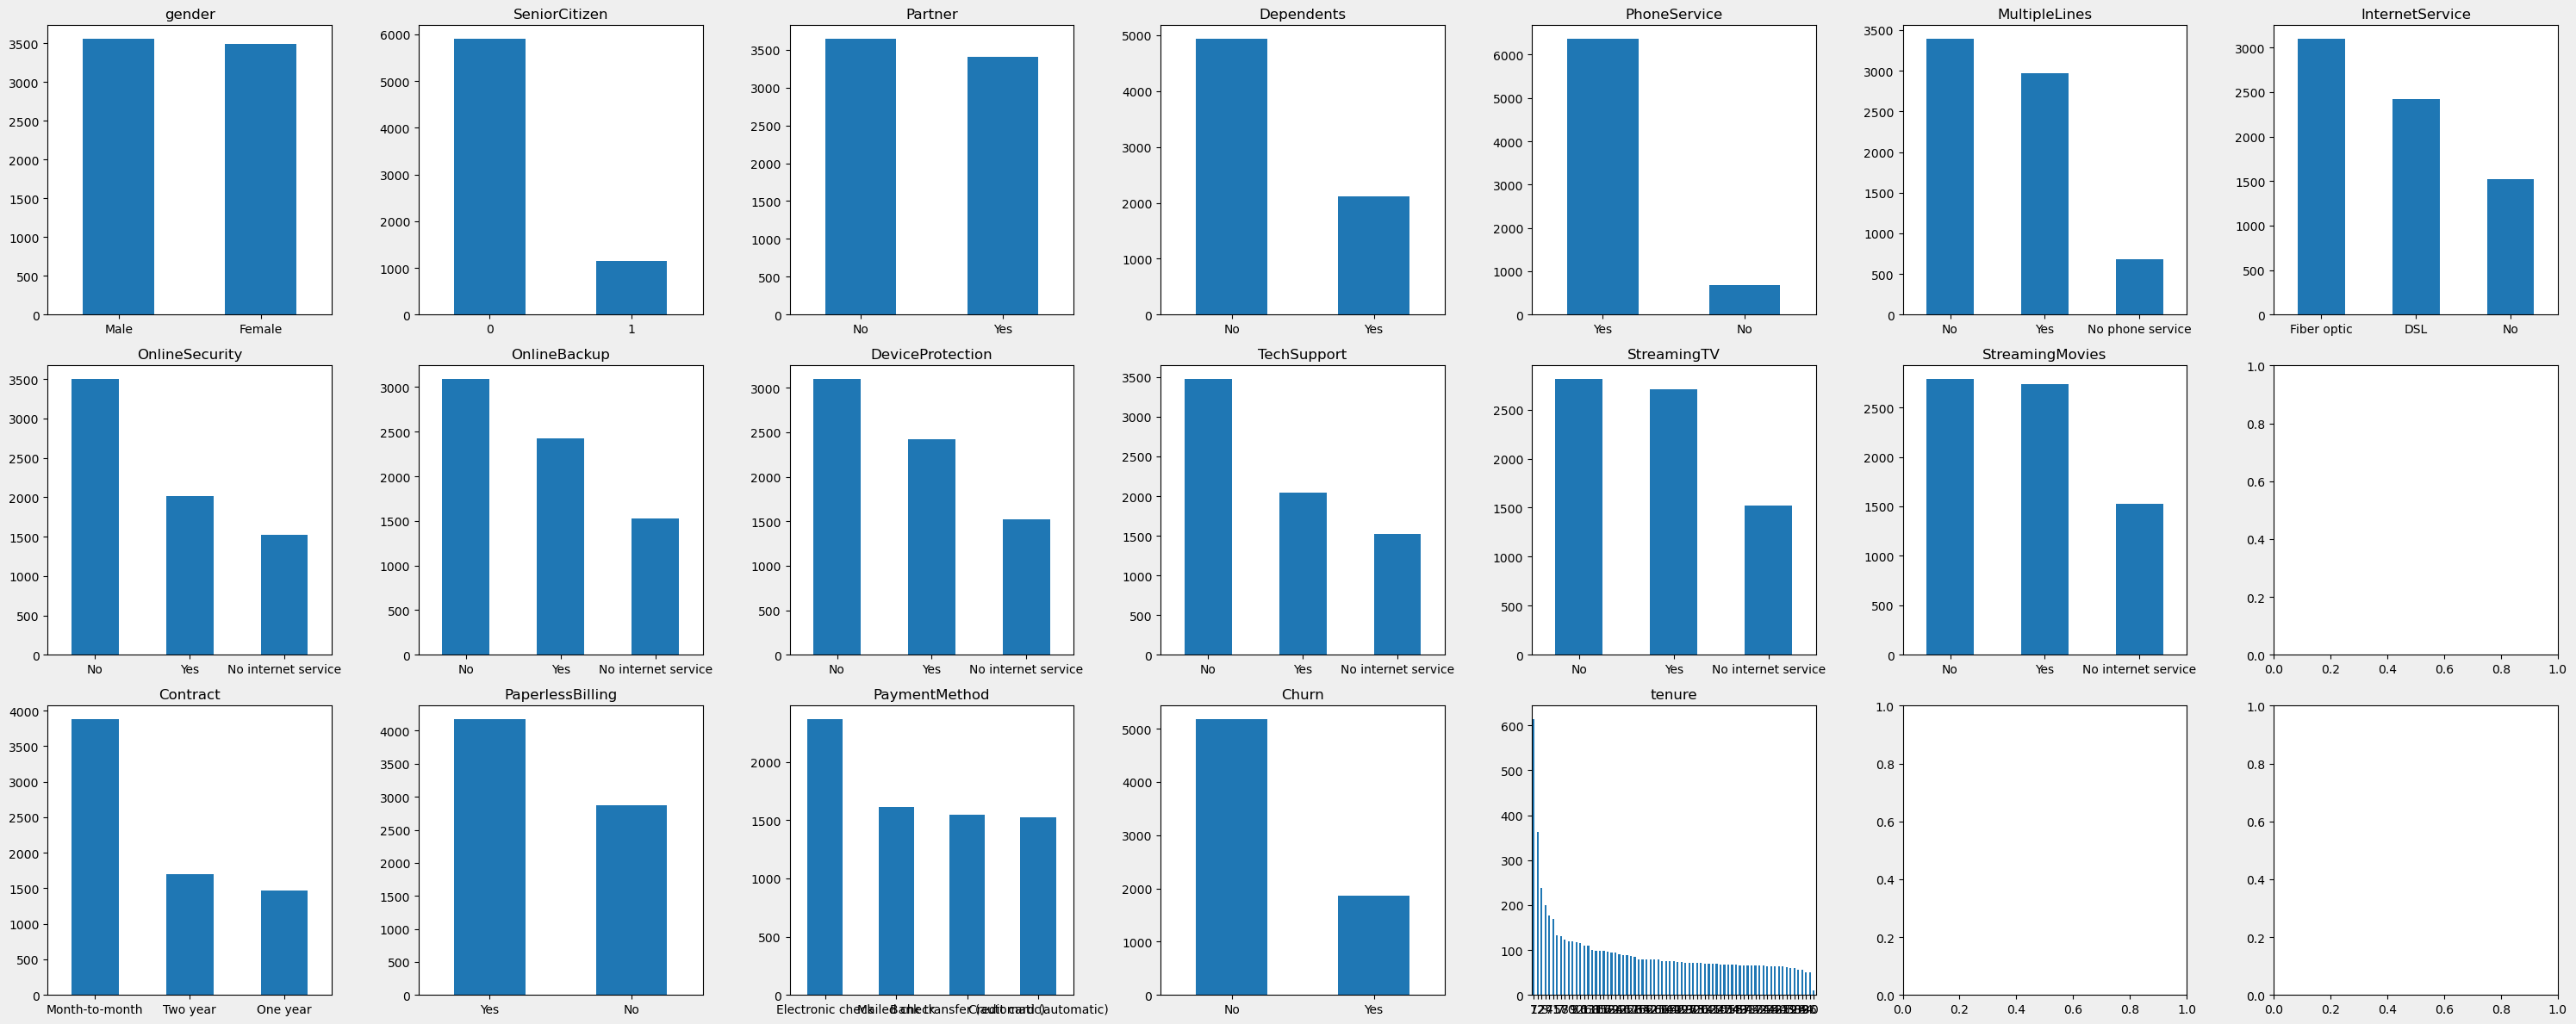

In [9]:
# 1 dimension distrbutions
dimensions = {
    'row1':['gender','SeniorCitizen','Partner','Dependents', 'PhoneService','MultipleLines','InternetService'],
    'row2': ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies'],
    'row3':['Contract','PaperlessBilling','PaymentMethod','Churn','tenure'],
}
fig =plt.figure(figsize=[30,12], tight_layout=True)
fig.patch.set_facecolor('#E0E0E0')
fig.patch.set_alpha(0.5)
axes = fig.subplots(3, 7, sharex=False)

row = 0
for cat in list(dimensions.keys()):
    num = len(cat)
    for col in range(len(dimensions[cat])):
        #print(dfc[dimensions[cat][col]].value_counts())
        dfc[dimensions[cat][col]].value_counts().plot(kind='bar',ax=axes[row,col], rot=0)
        axes[row,col].set_title(dimensions[cat][col])
    row =row +1

In [10]:
# 2 dimensions distribution

#,facet_row ='InternetService',barmode='group', barnorm='percent', marginal='histogram'
px.histogram(dfc,x='gender',color='Churn',facet_col='Contract',width=900, height=250, template="simple_white",barmode='group').show() 
px.histogram(dfc,x='SeniorCitizen',color='Churn', facet_col='Contract',width=900, height=250, template="simple_white",barmode='group').show()
px.histogram(dfc,x='Partner',color='Churn',facet_col='Contract',width=900, height=250, template="simple_white",barmode='group').show()
px.histogram(dfc,x='Dependents',color='Churn',facet_col='Contract',width=900, height=250, template="simple_white",barmode='group').show()

px.histogram(dfc,x='PhoneService',color='Churn',facet_col='Contract',width=900, height=250, template="simple_white",barmode='group').show()
px.histogram(dfc,x='PaperlessBilling',color='Churn',facet_col='Contract',width=900, height=250, template="simple_white",barmode='group').show()
px.histogram(dfc,x='PaymentMethod',color='Churn',facet_col='Contract',width=900, height=250, template="simple_white",barmode='group').show()

In [11]:
# numerical variables 
px.histogram(dfc,x='SeniorCitizen',color='Churn', facet_col='Contract',width=900, height=250, template="simple_white",barmode='group').show()
px.histogram(dfc,x='SeniorCitizen',color='Churn', facet_col='PaperlessBilling',width=900, height=250, template="simple_white",barmode='group').show()

dfc['SeniorCitizenCat'] = np.where(dfc['SeniorCitizen']>0,'Yes','No')
px.box(dfc,x='SeniorCitizenCat',y='TotalCharges',color='Churn',facet_col='Contract', width=900, height=300, template="simple_white").show()
px.box(dfc,x='SeniorCitizenCat',y='MonthlyCharges',color='Churn',facet_col='Contract', width=900, height=300, template="simple_white").show()
px.box(dfc,x='SeniorCitizenCat',y='tenure',color='Churn',facet_col='Contract', width=900, height=300, template="simple_white").show()

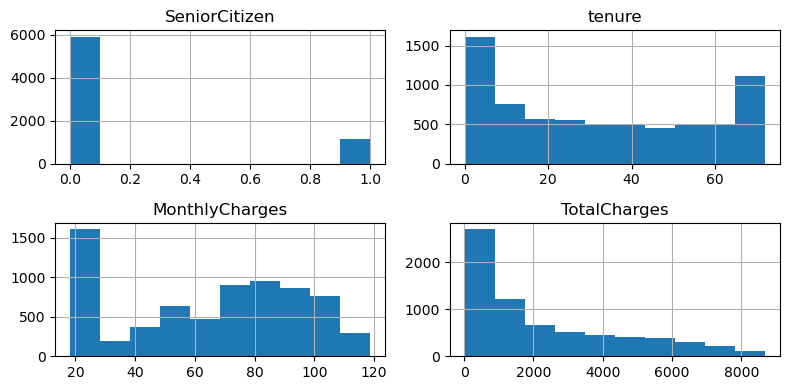

In [12]:
# alternative
fig = plt.figure(figsize = (8,4))
ax = fig.gca()
dfc.hist(ax=ax)
fig.tight_layout()

# 2. Features

In [13]:
# drop
dfc=dfc.drop(columns=['SeniorCitizenCat'])

In [14]:
dfc.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [15]:
# convert two-values categorical to binary variable
#dfc['gender']=np.where(dfc['gender']=='Male',1,0) # 1: male, 0: female
dfc['gender']=dfc['gender'].map(dict(Male=1,Female=0))
dfc['SeniorCitizen']=pd.Categorical(dfc['SeniorCitizen'])

columns = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']
for col in columns: 
    #dfc[col]=np.where(dfc[col]== 'Yes',1,0)
    dfc[col]=dfc[col].map(dict(Yes=1,No=0))

In [16]:
dfc.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [17]:
dfc=dfc.dropna()

In [18]:
dfc.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [19]:
dfc.shape

(7032, 20)

In [20]:
# convert other categorical variables to dummy variables
categorical_variables = [
     'MultipleLines',
     'InternetService',
     'OnlineSecurity',
     'OnlineBackup',
     'DeviceProtection',
     'TechSupport',
     'StreamingTV',
     'StreamingMovies',
     'Contract',
     'PaymentMethod',
]
dfc_dummies = pd.get_dummies(dfc, columns=categorical_variables)

In [21]:
dfc_dummies.dtypes

gender                                        int64
SeniorCitizen                              category
Partner                                       int64
Dependents                                    int64
tenure                                        int64
PhoneService                                  int64
PaperlessBilling                              int64
MonthlyCharges                              float64
TotalCharges                                float64
Churn                                         int64
MultipleLines_No                              uint8
MultipleLines_No phone service                uint8
MultipleLines_Yes                             uint8
InternetService_DSL                           uint8
InternetService_Fiber optic                   uint8
InternetService_No                            uint8
OnlineSecurity_No                             uint8
OnlineSecurity_No internet service            uint8
OnlineSecurity_Yes                            uint8
OnlineBackup

<AxesSubplot:>

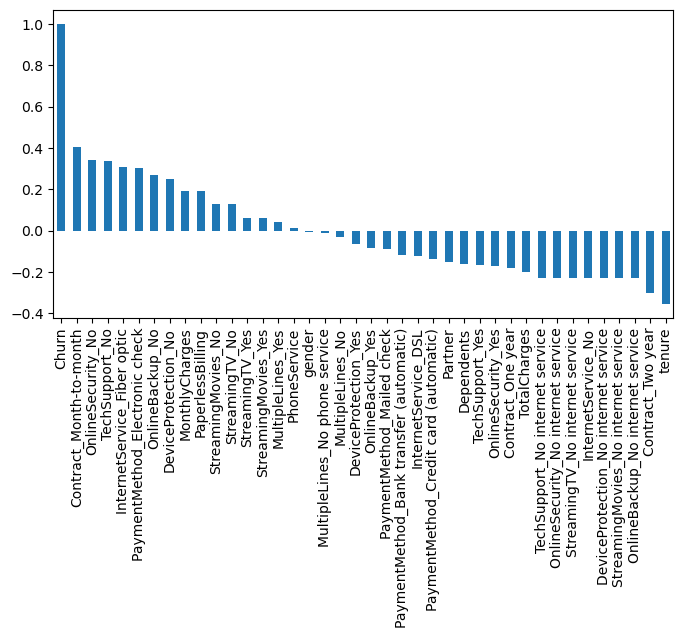

In [22]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(8,4))
dfc_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [27]:
# remove TotalCharges?
X = dfc_dummies.drop(columns=['Churn'])
Y = dfc_dummies['Churn']

In [ ]:
# MinMaxScaler class of sklearn.preprocessing is used for normalization of features.
# Normalization is about transforming the feature values to fall within the bounded intervals (min and max)
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [28]:
# StandardScaler class of sklearn.preprocessing is used for standardization of features.
# Standardization is about transforming the feature values to fall around mean as 0 with standard deviation as 1
features = X.columns.values
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

# 3. Modeling

In [29]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt="d"); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not churn', 'churn']); ax.yaxis.set_ticklabels(['did not churn', 'churn'])

In [30]:
def plot_roc_curve (y, y_predict):
    roc = roc_curve(y, y_predict)
    auc_score = roc_auc_score(y, y_predict)
    plt.plot(roc[0], roc[1], marker='o')
    plt.title('AUC Score: {}'.format(auc_score))
    plt.xlabel('FPR: False positive rate')
    plt.ylabel('TPR: True positive rate')
    plt.grid()
    plt.show()
    

In [31]:
def print_model_measures(Y_test, yhat):
    print('Accuracy Score:{}'.format(accuracy_score(Y_test, yhat)))
    print('Precision Score:{}'.format(precision_score(Y_test, yhat)))
    print('Recall Score:{}'.format(recall_score(Y_test, yhat)))
    print('F1 Score:{}'.format(f1_score(Y_test, yhat)))
    print('Jaccard Score:{}'.format(jaccard_score(Y_test, yhat)))

split dataset into training and testing

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

## 3.1 Logistic Regression

In [33]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
lr_cv = GridSearchCV(estimator=lr,param_grid=parameters, cv=10)
lr_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

Best hpyerparameters:{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'} with accuray of 0.8030189060890122

using best esitimator.........
Accuracy : 0.8045486851457001
Accuracy Score:0.8045486851457001
Precision Score:0.6477611940298508
Recall Score:0.5802139037433155
F1 Score:0.6121297602256699
Jaccard Score:0.4410569105691057
Log Loss:6.750716319187776


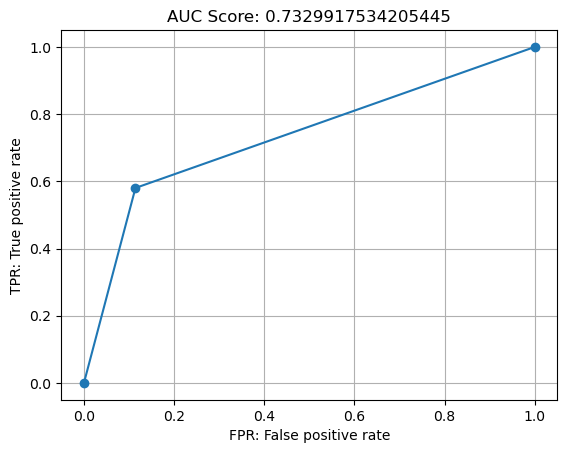

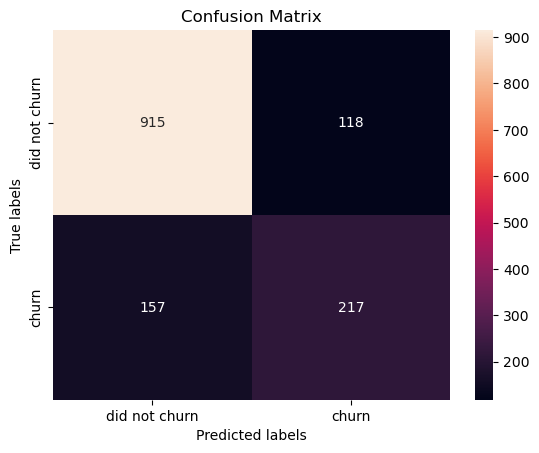

In [34]:
print("Best hpyerparameters:{} with accuray of {}".format(lr_cv.best_params_, lr_cv.best_score_))
print("")
print("using best esitimator.........")
best_estimator = lr_cv.best_estimator_
lr_score = best_estimator.score(X_test, Y_test)
yhat=lr_cv.predict(X_test)
print("Accuracy :",lr_score)
# other measures
print_model_measures(Y_test, yhat)
print('Log Loss:{}'.format(log_loss(Y_test, yhat)))
plot_roc_curve(Y_test, yhat)
plot_confusion_matrix(Y_test,yhat)

<AxesSubplot:>

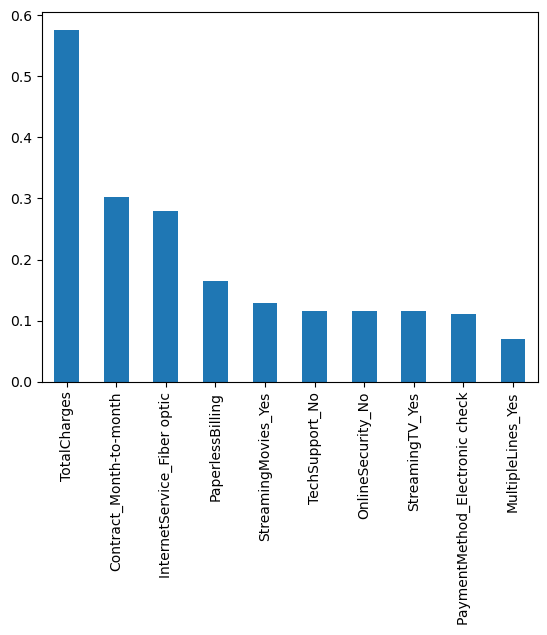

In [35]:
# To get the weights of all the variables
weights = pd.Series(best_estimator.coef_[0],index=X.columns.values)
weights.sort_values(ascending = False)[:10].plot(kind='bar')

<AxesSubplot:>

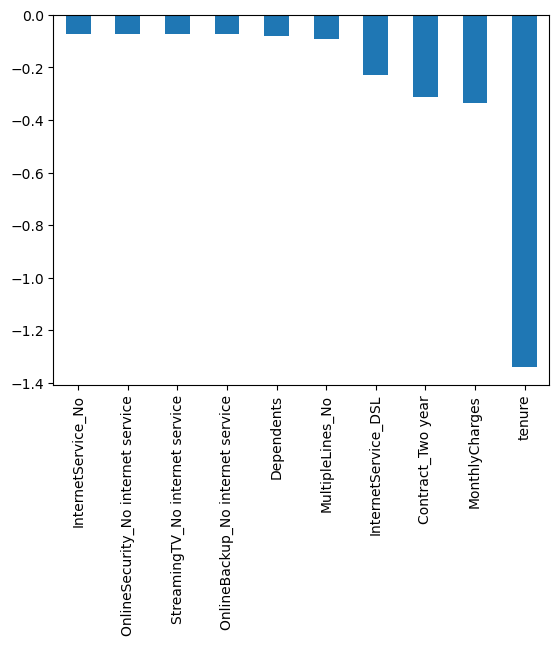

In [36]:
weights.sort_values(ascending = False)[-10:].plot(kind='bar')

## 3.2 SVM

In [ ]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'), 'C': np.logspace(-3, 3, 5),'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(estimator=svm, param_grid=parameters, cv=10)
svm_cv.fit(X_train,Y_train)

print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)
best_estimator = svm_cv.best_estimator_
svm_score = best_estimator.score(X_test, Y_test)
print("accuracy :", svm_score)
yhat=svm_cv.predict(X_test)

# other metrics

print_model_measures(Y_test, yhat)
plot_roc_curve(Y_test, yhat)
plot_confusion_matrix(Y_test,yhat)

## 3.3 Decision Tree

In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     #'max_features': ['auto', 'sqrt'],
     'max_features': ['sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, param_grid=parameters, cv=10)
tree_cv.fit(X_train, Y_train)

In [ ]:
print("Best hpyerparameters:{} with accuray of {}".format(tree_cv.best_params_, tree_cv.best_score_))
print("")
print("Using best esitimator.........")
best_estimator = tree_cv.best_estimator_
tree_score = best_estimator.score(X_test, Y_test)
yhat=tree_cv.predict(X_test)
print("Accuracy :",tree_score)

# other measures
print_model_measures(Y_test, yhat)
plot_roc_curve(Y_test, yhat)
plot_confusion_matrix(Y_test,yhat)

## 3.4 K-Nearest Neighbor

In [ ]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [ ]:
knn_cv = GridSearchCV(estimator=KNN, param_grid=parameters)
knn_cv.fit(X_train, Y_train)

In [ ]:
print("Best hpyerparameters:{} with accuray of {}".format(knn_cv.best_params_, knn_cv.best_score_))
print("")
print("Using best esitimator.........")
best_estimator = knn_cv.best_estimator_
knn_score = best_estimator.score(X_test, Y_test)
yhat=knn_cv.predict(X_test)
print("Accuracy :",knn_score)

# other measures
print_model_measures(Y_test, yhat)
plot_roc_curve(Y_test, yhat)
plot_confusion_matrix(Y_test,yhat)